# ML T-Generation Занятие 2: Data Wrangling Основы работы с векторными данными и визуализацией. NumPy, Pandas и matplotlib.

# Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [11]:
import pandas as pd
import numpy as np

#магия для отображения графиков в тетрадке
%matplotlib inline 

На первое время хорошо держать под рукой шпаргалку с набором полезных функций

In [3]:
from IPython.display import Image
Image(url='http://storage.ning.com/topology/rest/1.0/file/get/2808327959?profile=original') 

In [5]:
from IPython.display import Image
Image(url='https://cdn.tproger.ru/wp-content/uploads/2020/01/pandas_cheatsheet_2-1.jpg') 

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [6]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [7]:
# тут можно наблюдать "консистентность" между библиотеками numpy и pandas
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [8]:
salaries.Andrew == salaries['Andrew']

True

In [9]:
salaries['Andrew'], salaries.Andrew

(400, 400)

**Series поддерживает пропуски в данных.**

In [12]:
salaries['Carl'] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [13]:
salaries['Carl']

nan

In [14]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [15]:
salaries.fillna(salaries.median(), inplace=True)

In [16]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [17]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print(len(salaries[salaries > 0]), 'Положительных значение\n')

Второй элемент серии 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

5 Положительных значение



Можно передавать в функции numpy

In [18]:
print(np.exp(salaries))

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [24]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.759163,a,False
1,0.269799,b,False
2,0.190981,c,False
3,0.400554,d,True
4,0.521535,e,True


In [25]:
type(df2)

pandas.core.frame.DataFrame

**Обращение к элементам (или целым кускам фрейма):**

In [26]:
print('Элемент на 3 позиции в столбце 3 = ', df2.at[3, 'B'], '\n')
print(df2.loc[1:4, 'A':'C'])

Элемент на 3 позиции в столбце 3 =  d 

          A  B      C
1  0.269799  b  False
2  0.190981  c  False
3  0.400554  d   True
4  0.521535  e   True


**Изменение элементов и добавление новых:**

In [27]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.759163,a,False
1,0.269799,b,False
2,0.190981,f,False
3,0.400554,d,True
4,0.521535,e,True


In [29]:
df2.loc[4]

A    0.521535
B           e
C        True
Name: 4, dtype: object

In [30]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.759163,a,False
1,0.269799,b,False
2,0.190981,f,False
3,0.400554,d,True
4,0.521535,e,True
5,3.141500,c,False


In [43]:
df2.loc[4, 2]
# нужны названия колонок

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <class 'int'>

In [45]:
df2

,A,B,C
0,0.759163,a,False
1,0.269799,b,False
2,0.190981,f,False
3,0.400554,d,True
4,0.521535,e,True
5,3.141500,c,False


In [42]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

NameError: name 'df1' is not defined

#### Обработка пропущенных значений

In [118]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,f1,f2,f3,A,C
o1,0.732111,0.573633,0.575938,NaN,NaN
o2,-1.816183,0.955088,-2.336613,NaN,NaN
o3,-1.339398,1.054198,-0.012071,NaN,NaN
o4,1.235483,1.032319,1.175765,NaN,NaN
o5,0.358556,-0.381908,-0.634725,NaN,NaN


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [119]:
pd.isnull(df1)

,f1,f2,f3,A,C
o1,False,False,False,True,True
o2,False,False,False,True,True
o3,False,False,False,True,True
o4,False,False,False,True,True
o5,False,False,False,True,True


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [184]:
df1

,A,B,C
o1,0.950484,1.084640,-1.435030
o2,NaN,0.158331,-1.009422
o3,-0.206719,3.027581,-0.772277
o4,-0.161172,-2.269827,NaN
o5,0.449404,-0.280045,-1.936744


In [190]:
df1.dropna(how='any',axis=1)

,B
o1,1.084640
o2,0.158331
o3,3.027581
o4,-2.269827
o5,-0.280045


In [46]:
df1.shape

(6, 3)

In [47]:
df1.shape[0]*[0]

[0, 0, 0, 0, 0, 0]

In [195]:
df1['D'] = df1.shape[0]*[np.nan]

In [196]:
df1

,A,B,C,D
o1,0.950484,1.084640,-1.435030,NaN
o2,NaN,0.158331,-1.009422,NaN
o3,-0.206719,3.027581,-0.772277,NaN
o4,-0.161172,-2.269827,NaN,NaN
o5,0.449404,-0.280045,-1.936744,NaN


In [197]:
df1.dropna(how='all', axis=1)

,A,B,C
o1,0.950484,1.084640,-1.435030
o2,NaN,0.158331,-1.009422
o3,-0.206719,3.027581,-0.772277
o4,-0.161172,-2.269827,NaN
o5,0.449404,-0.280045,-1.936744


In [203]:
df1[~df1['A'].isnull()]

,A,B,C,D
o1,0.950484,1.084640,-1.435030,NaN
o3,-0.206719,3.027581,-0.772277,NaN
o4,-0.161172,-2.269827,NaN,NaN
o5,0.449404,-0.280045,-1.936744,NaN


**Пропуски можно заменить каким-то значением.**

In [122]:
df1.fillna(0)

,f1,f2,f3,A,C
o1,0.732111,0.573633,0.575938,0.0,0.0
o2,-1.816183,0.955088,-2.336613,0.0,0.0
o3,-1.339398,1.054198,-0.012071,0.0,0.0
o4,1.235483,1.032319,1.175765,0.0,0.0
o5,0.358556,-0.381908,-0.634725,0.0,0.0


## Пример первичного анализа данных с Pandas

In [51]:
import os
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [52]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv'

In [53]:
pass_data = pd.read_csv(url, sep='\t')
#если делаете без интернета воспользуйтесь следующей строчкой
#pass_data = pd.read_csv('data/titanik.csv', sep='\t')

In [54]:
#сохраним файлы локально
pass_data.to_csv('data/titanik.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/titanik.csv'

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [55]:
pass_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [56]:
pass_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Посмотрим на признаки:

In [57]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [58]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [59]:
pass_data = pass_data.rename (str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [60]:
pass_data[2:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [61]:
pass_data.iloc[1:5, 1:3]

,survived,pclass
1,1,1
2,1,3
3,1,1
4,0,3


In [132]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [134]:
pass_data[['name', 'sex', 'pclass']].head()

,name,sex,pclass
0,"Braund, Mr. Owen Harris",male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,3


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [75]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [136]:
pass_data.shape

(156, 12)

In [76]:
# TASK: вывести женщин старше 60 и мужчины на борту
# Ваш код здесь
# 
pass_data[((pass_data['sex'] == 'female') & (pass_data['age'] > 60)) | (pass_data['sex'] == 'male')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


& - и | - или

In [138]:
pass_data[pass_data['sex']=='female'].sort_values(['age'], ascending=False)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [79]:
# TASK: Посмотрим, сколько на борту было относительно молодых женщин,
# путешествующих в одиночку. Скорее всего, довольно мало,
# потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.
# Ваш код здесь
# 
pass_data[((pass_data['sex'] == 'female') & ((pass_data['age'] >= 18) & (pass_data['age'] <= 35)) & (pass_data['sibsp'] == 0))]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S


Кроме того, для заданного признака можно построить гистограмму:

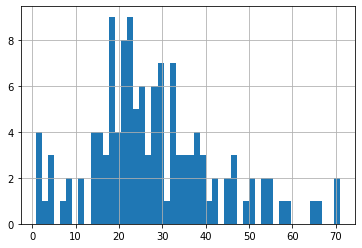

In [83]:
pass_data.age.hist(bins = 50)

## Редактирование DataFrame

* Переименование признаков

In [84]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [88]:
# TASK: написать функцию возвращающее фамилию
def get_last_name(surnames):
    return surnames.split(',')[0]

In [89]:
last_names = pass_data['name'].apply(get_last_name)
last_names.head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: name, dtype: object

* Добавление признака

In [90]:
pass_data['Last_name'] = last_names
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


* Удаление признака

In [91]:
pass_data.drop('Last_name', axis=1).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

KeyError: "['Last_name'] not found in axis"

* Работа с пропущенными данными

In [96]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
passengerid    156 non-null int64
survived       156 non-null int64
pclass         156 non-null int64
name           156 non-null object
Sex            156 non-null object
age            126 non-null float64
sibsp          156 non-null int64
parch          156 non-null int64
ticket         156 non-null object
fare           156 non-null float64
cabin          31 non-null object
embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [104]:
pass_data['cabin'].isnull().head()

pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


* Сортировка объектов/признаков

In [105]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [107]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [112]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [113]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         35
        2         12
        1          9
male    3         61
        1         21
        2         18
Name: pclass, dtype: int64

In [114]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,30.0,79.50194,65.172104,26.2833,48.290625,61.6792,78.721875,263.0000
2,30.0,23.65972,16.048141,10.5000,13.000000,21.0000,27.312500,73.5000
3,96.0,13.44006,9.998511,6.7500,7.854200,8.0500,15.309350,56.4958


In [115]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    24.468085
male      30.326962
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [116]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.714286
male      0.140000
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [117]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.400000
2    0.466667
3    0.291667
Name: survived, dtype: float64

Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [120]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

,Sex,survived
0,female,0.714286
1,male,0.140000


## Сохранение данных

Также данные можно сохранить в файл:

In [121]:
pass_data.to_csv('titanic_2.csv', index=False)

# Самостоятельная работа  №2 

In [122]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [123]:
# 1. создать датафрейм
# Ваш код здесь
df = pd.DataFrame(data = data, index = labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [124]:
# Вывести первые 3 строки
# Ваш код здесь
df[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [132]:
# Вывести значения где пропущены age
# Ваш код здесь
df[df.age.isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [128]:
# Вывести сумму всех посещений
# Ваш код здесь
df.visits.sum()

19

In [129]:
# Посчитать количество каждого типа в колонке animal
# Ваш код здесь
len(np.unique(df.animal))

3

In [ ]:
# Сохранить в формате csv
# Ваш код здесь

In [131]:
df.to_csv('my_zoo.csv', index=False)